In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_csv('../../data/data-unnormalised.csv')
data.dropna(inplace=True)

In [3]:
train_fraction = 0.75
data_train = data.sample(frac=train_fraction)
data_test = data.loc[~data.index.isin(data_train.index)]

In [4]:
y_train = data_train['price'].as_matrix()
data_train.drop('price', axis=1, inplace=True)
X_train = data_train.as_matrix()

y_test = data_test['price'].as_matrix()
data_test.drop('price', axis=1, inplace=True)
X_test = data_test.as_matrix()

/Users/harish/Desktop/uk-property-prices/housing-data/venv/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.02, 'loss': 'ls', 'verbose': 1}
clf = GradientBoostingRegressor()

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 26501716561.5363


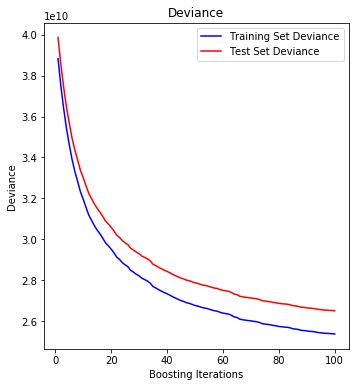

In [6]:
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

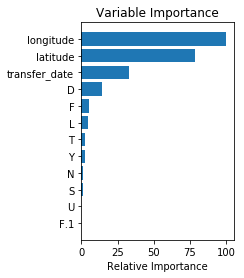

In [7]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [8]:
clf.predict(X_train[400].reshape(1, -1))

array([ 276471.67330259])

In [9]:
y_train[400]

210000

In [12]:
clf.predict(X_test[501221].reshape(1, -1))

array([ 130863.54350042])

In [13]:
y_test[501221]

125000